In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars =pd.read_csv("Cars.csv")

In [3]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [7]:
cars =pd.DataFrame(cars,columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [11]:
"""Description of columns
MPG: milega of the car(Mile per Gallon)(this is Y column to be predicted)
hp:horse power of the car (x1 column)
vol: volume ofthe car
"""

'Description of columns\nMPG: milega of the car(Mile per Gallon)(this is Y column to be predicted)\nhp:horse power of the car (x1 column)\nvol: vol\n'

In [14]:
'''
Assumptions in multilinear Regression
1.Linearity: the relationship are independent of each other
Independence: Obervation are independent of each other
homoscedasticity: the residuals(y-y_hat)exhibit constant variance at all level of the predictor
normal Distribution of Errors: the rediduals of the model are norm
'''

'\nAssumptions in multilinear Regression\n1.Linearity: the relationship are independent of each other\nIndependence: Obervation are independent of each other\nhomoscedasticity: the residuals(y-y_hat)exhibit constant variance at all level of the predictor\nnormal Distribution of Errors: the rediduals of the model are norm\n'

In [15]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [16]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

In [20]:
'''
Obervation about info(),missing values
there are no missing values
there are 81 obervation (81 diffrent cars data)
the data types of the columns are also relevant and valid
'''

'\nObervation about info(),missing values\nthere are no missing values\nthere are 81 obervation (81 diffrent cars data)\nthe data types of the columns are also relevant and valid\n'

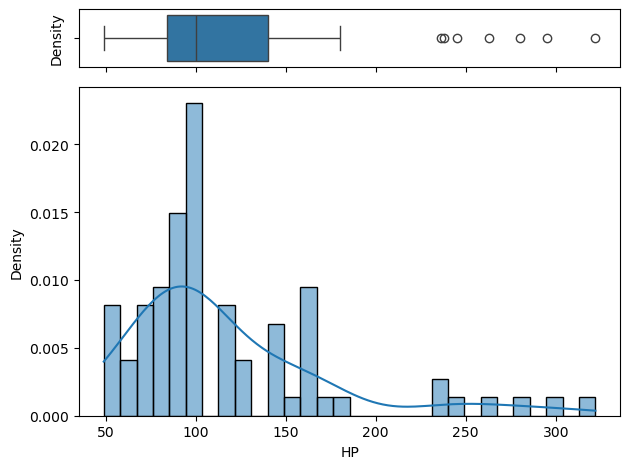

In [24]:
fig,(ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_box.set(ylabel='Density')
plt.tight_layout()
plt.show()


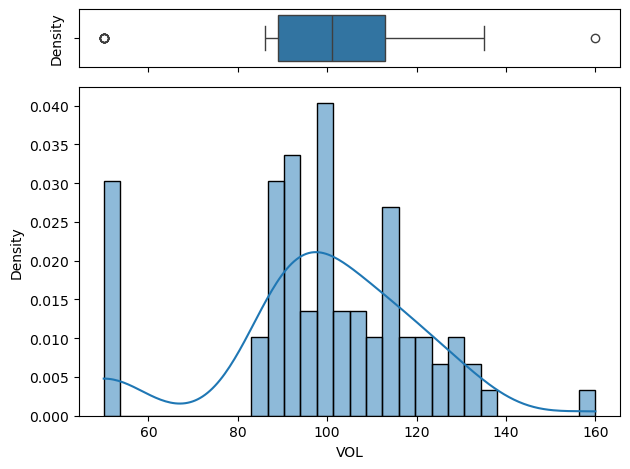

In [25]:
fig,(ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='VOL',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='VOL',ax=ax_hist,bins=30,kde=True,stat="density")
ax_box.set(ylabel='Density')
plt.tight_layout()
plt.show()


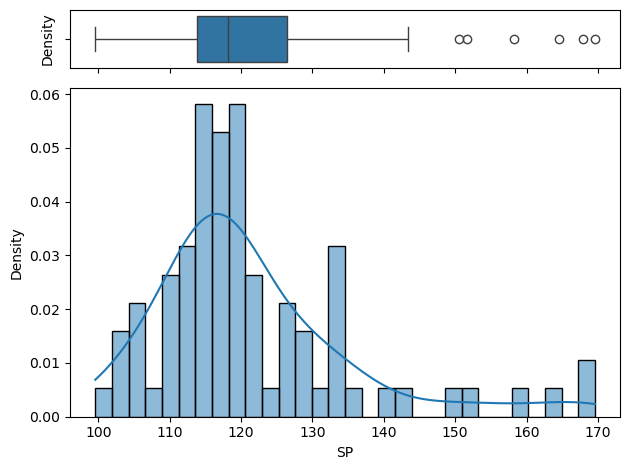

In [26]:
fig,(ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='SP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='SP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_box.set(ylabel='Density')
plt.tight_layout()
plt.show()


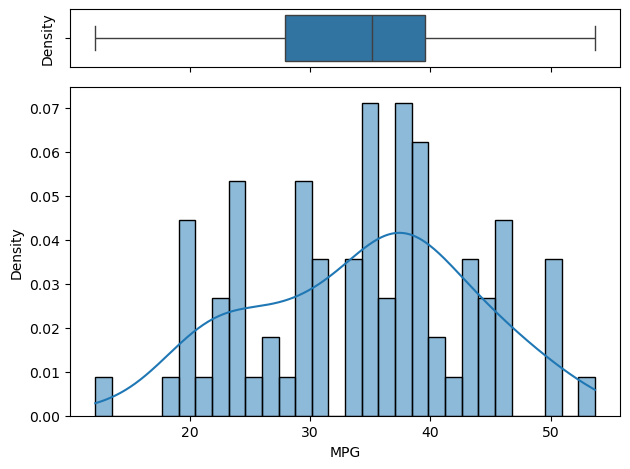

In [27]:
fig,(ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='MPG',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='MPG',ax=ax_hist,bins=30,kde=True,stat="density")
ax_box.set(ylabel='Density')
plt.tight_layout()
plt.show()


In [30]:
'''
Obervation from boxplot and histograms
there are some extreme values (outliers) oberved in towards the right tail of sp and hp dirtibution
in vol and wt columns,a few outliers are oberved in both tails of their diatribution
    the extreme values of cars data may have come from the specially designed nature of cars\
as this is multi dimensions data.the outliers with respect to spatial dimensions may have to be considered while building the regresssion model
'''

'\nObervation from boxplot and histograms\nthere are some extreme values (outliers) oberved in towards the right tail of sp and hp dirtibution\nin vol and wt columns,a few outliers are oberved in both tails of their diatribution\n    the extreme values of cars data may have come from the specially designed nature of carsas this is multi dimensions data.the outliers with respect to spatial dimensions may have to be considered while building the regresssion model\n'

In [29]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


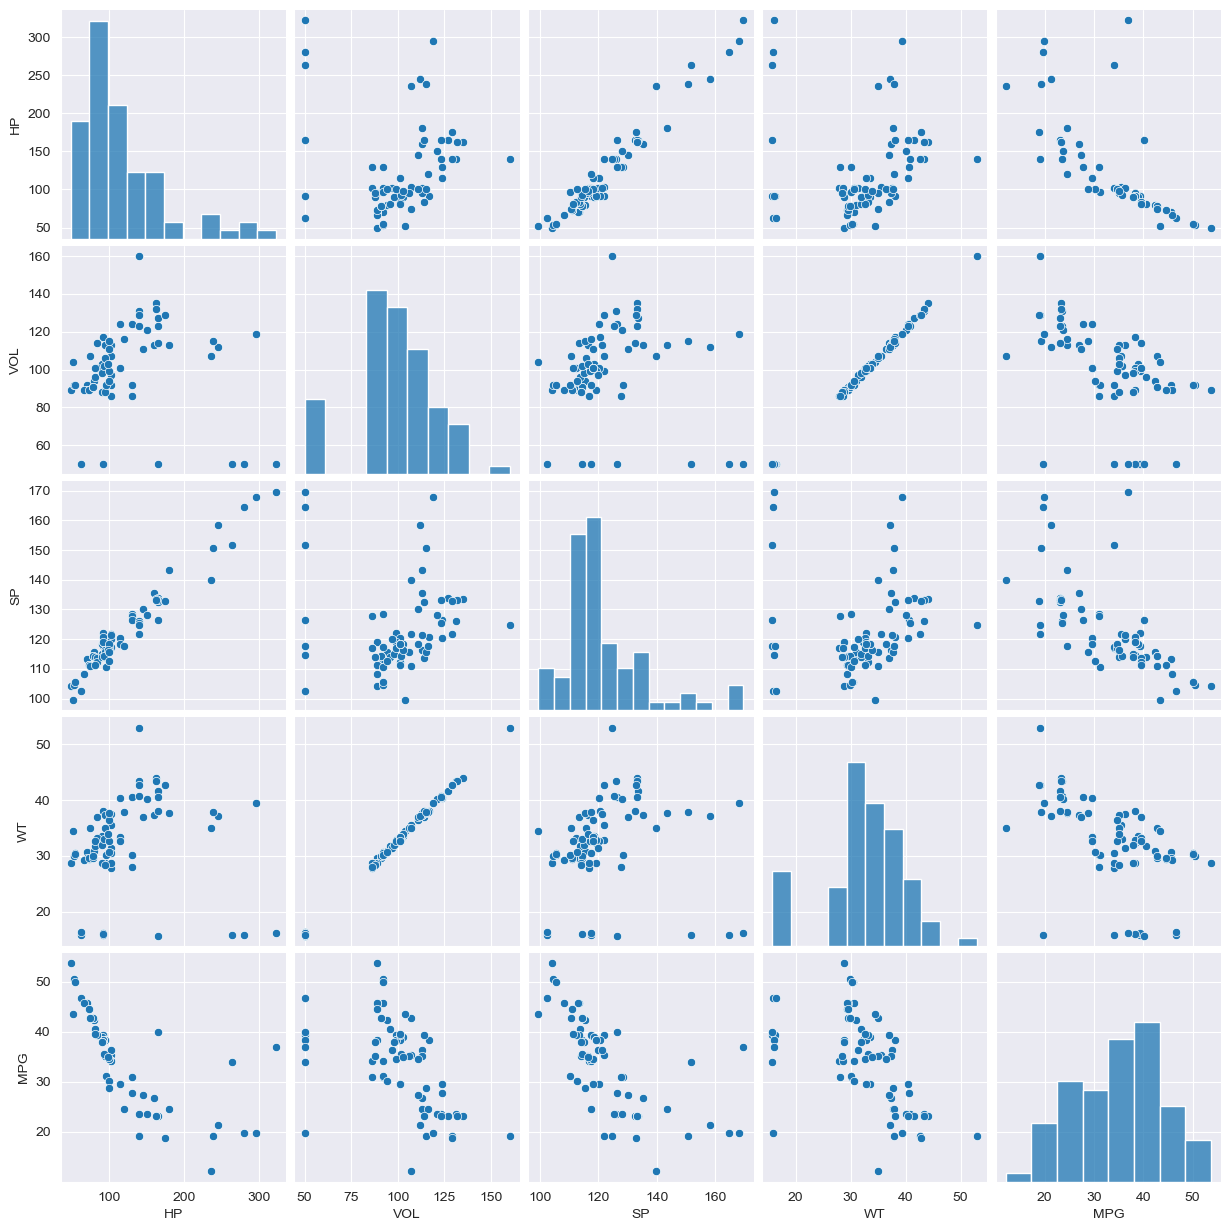

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

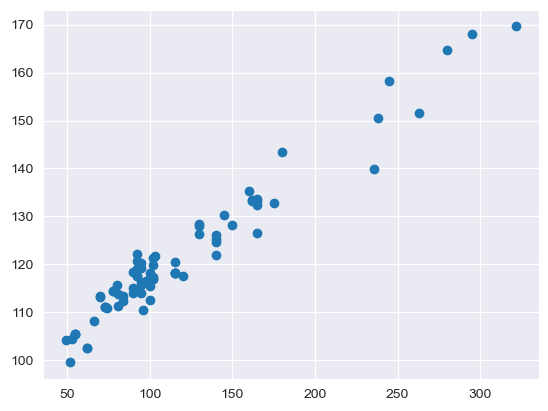

In [34]:

plt.scatter(cars["HP"],cars["SP"])